In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from datasets import load_dataset
import texthero as hero
from umap import UMAP

mpl.rcParams['figure.dpi'] = 300
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('max_colwidth', 100)

In [41]:
data_rtm = load_dataset("rotten_tomatoes", split = 'train+test+validation')
df_rtm = pd.DataFrame.from_dict(data_rtm[:])
df_rtm['label'] = df_rtm['label'].map({0: 'negative', 1: 'positive'})

df_rtm.head(10)

Found cached dataset rotten_tomatoes (C:/Users/jtoli/.cache/huggingface/datasets/rotten_tomatoes/default/1.0.0/40d411e45a6ce3484deed7cc15b82a53dad9a72aafd9f86f8f227134bec5ca46)


,text,label
0,"the rock is destined to be the 21st century's new "" conan "" and that he's going to make a splash...",positive
1,"the gorgeously elaborate continuation of "" the lord of the rings "" trilogy is so huge that a col...",positive
2,effective but too-tepid biopic,positive
3,"if you sometimes like to go to the movies to have fun , wasabi is a good place to start .",positive
4,"emerges as something rare , an issue movie that's so honest and keenly observed that it doesn't ...",positive
5,the film provides some great insight into the neurotic mindset of all comics -- even those who h...,positive
6,offers that rare combination of entertainment and education .,positive
7,perhaps no picture ever made has more literally showed that the road to hell is paved with good ...,positive
8,steers turns in a snappy screenplay that curls at the edges ; it's so clever you want to hate it...,positive
9,take care of my cat offers a refreshingly different slice of asian cinema .,positive


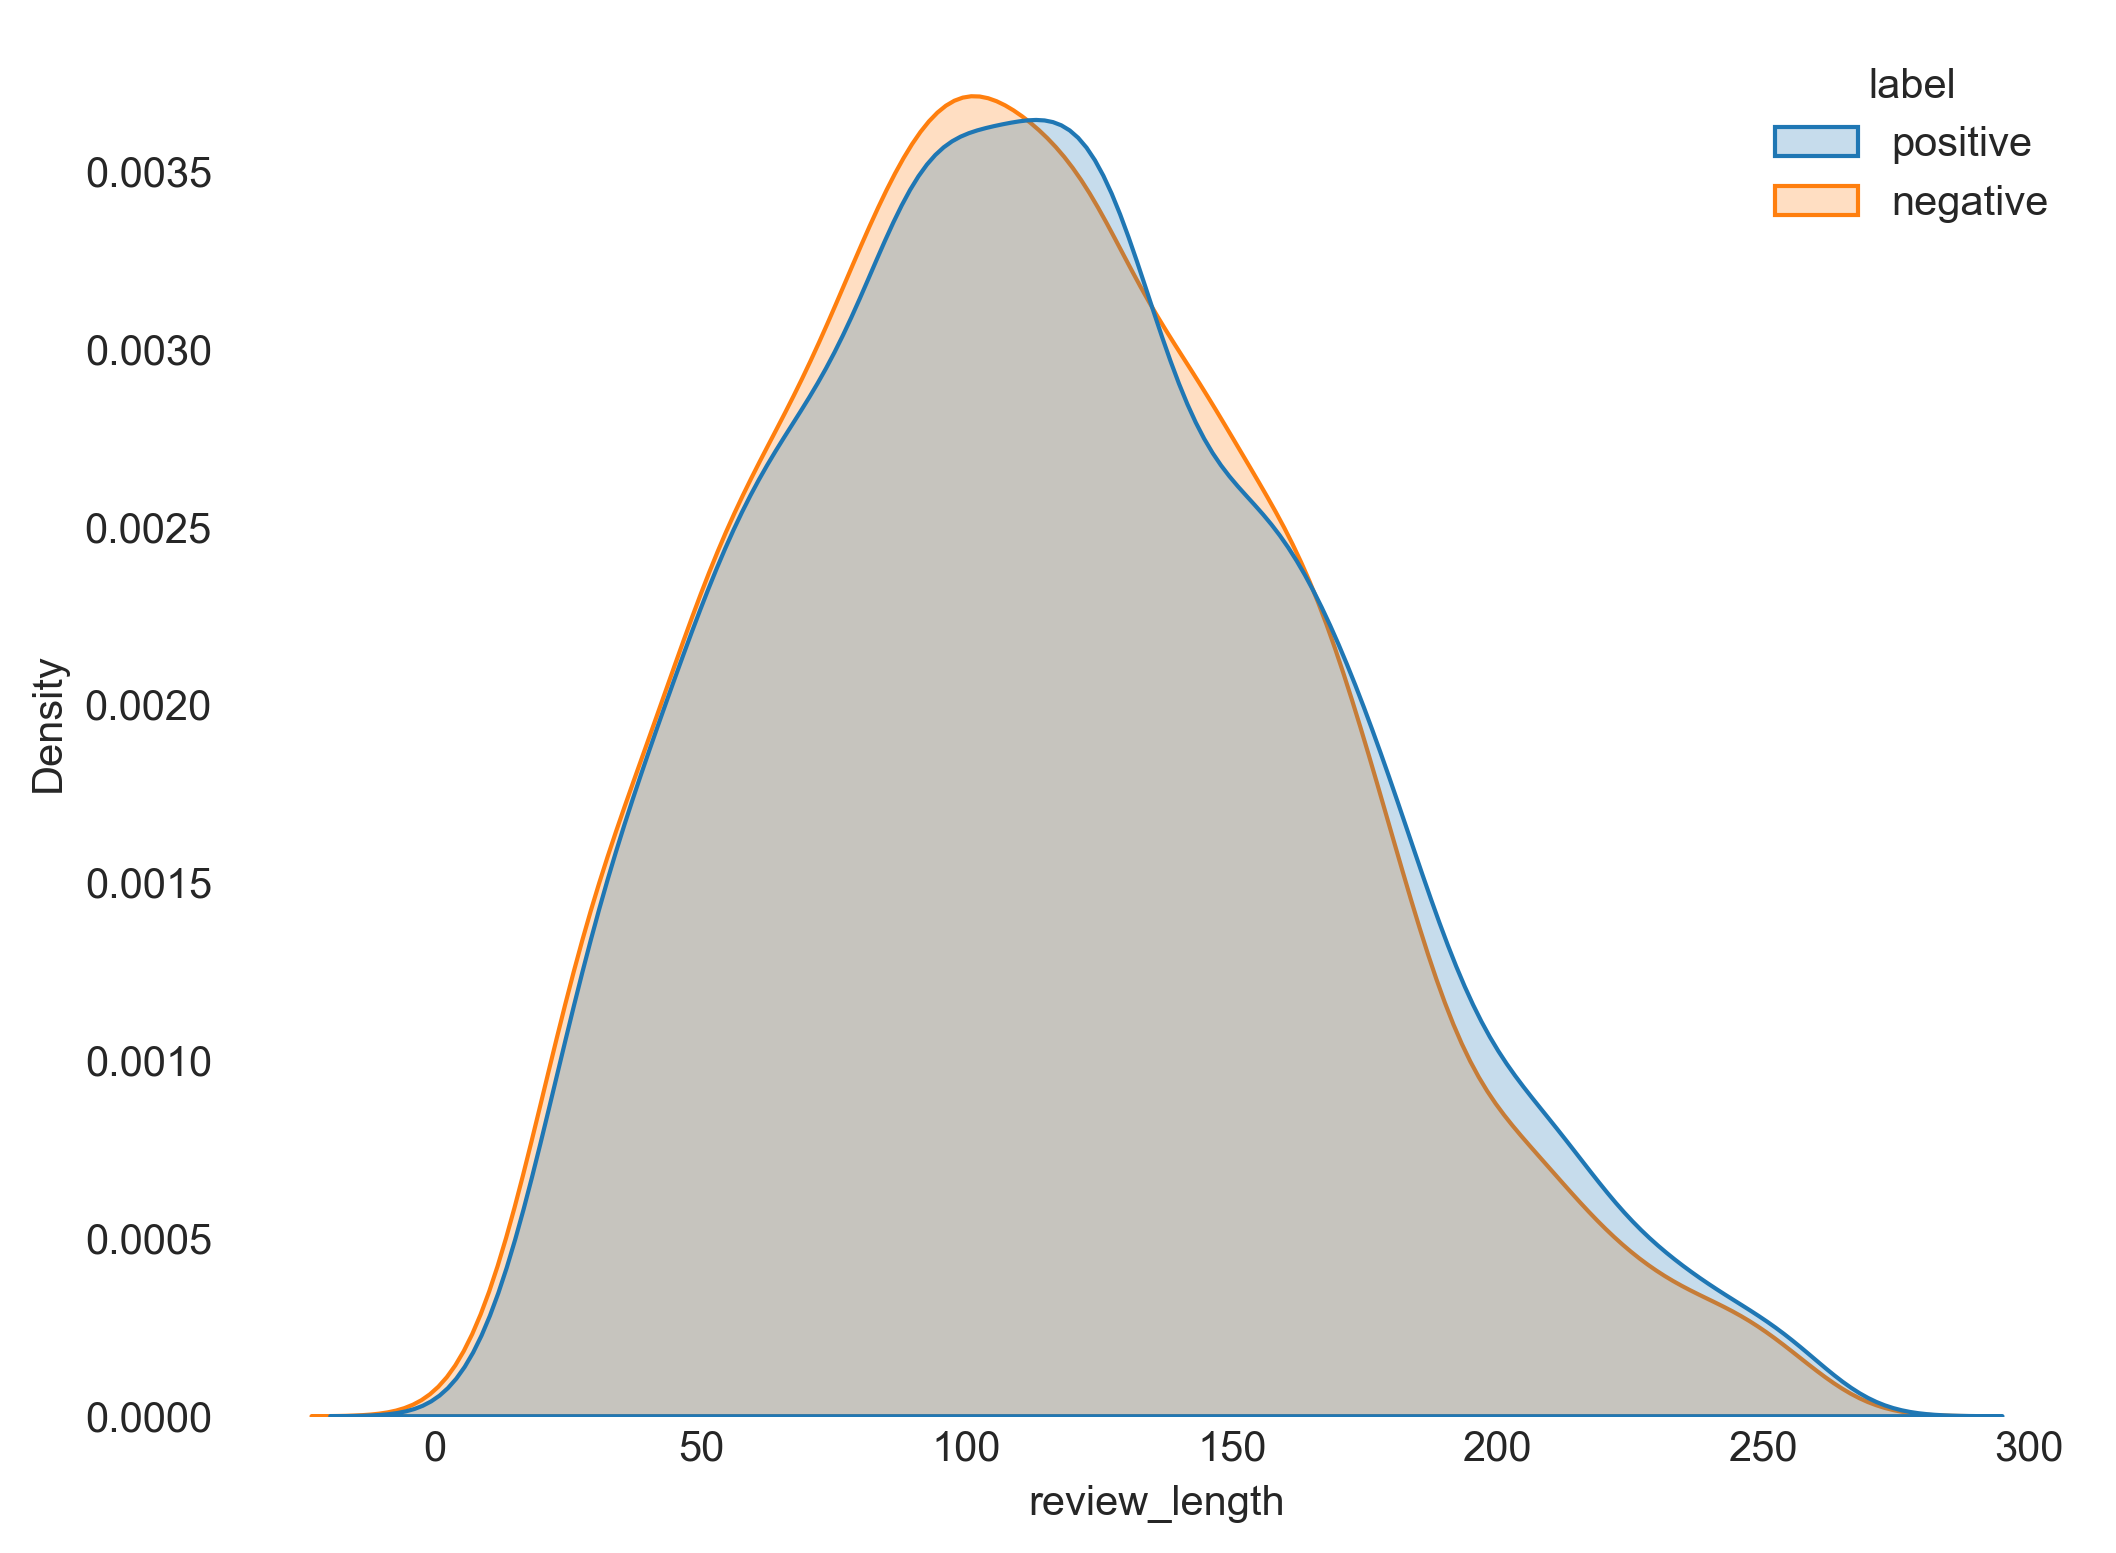

In [42]:
df_rtm['review_length'] = df_rtm['text'].str.len()

fig, ax = plt.subplots(figsize = (8,6))
ax.grid(False)
ax.set_frame_on(False)

sns.kdeplot(df_rtm, x="review_length", hue="label",
            fill=True, ax = ax)

plt.show()

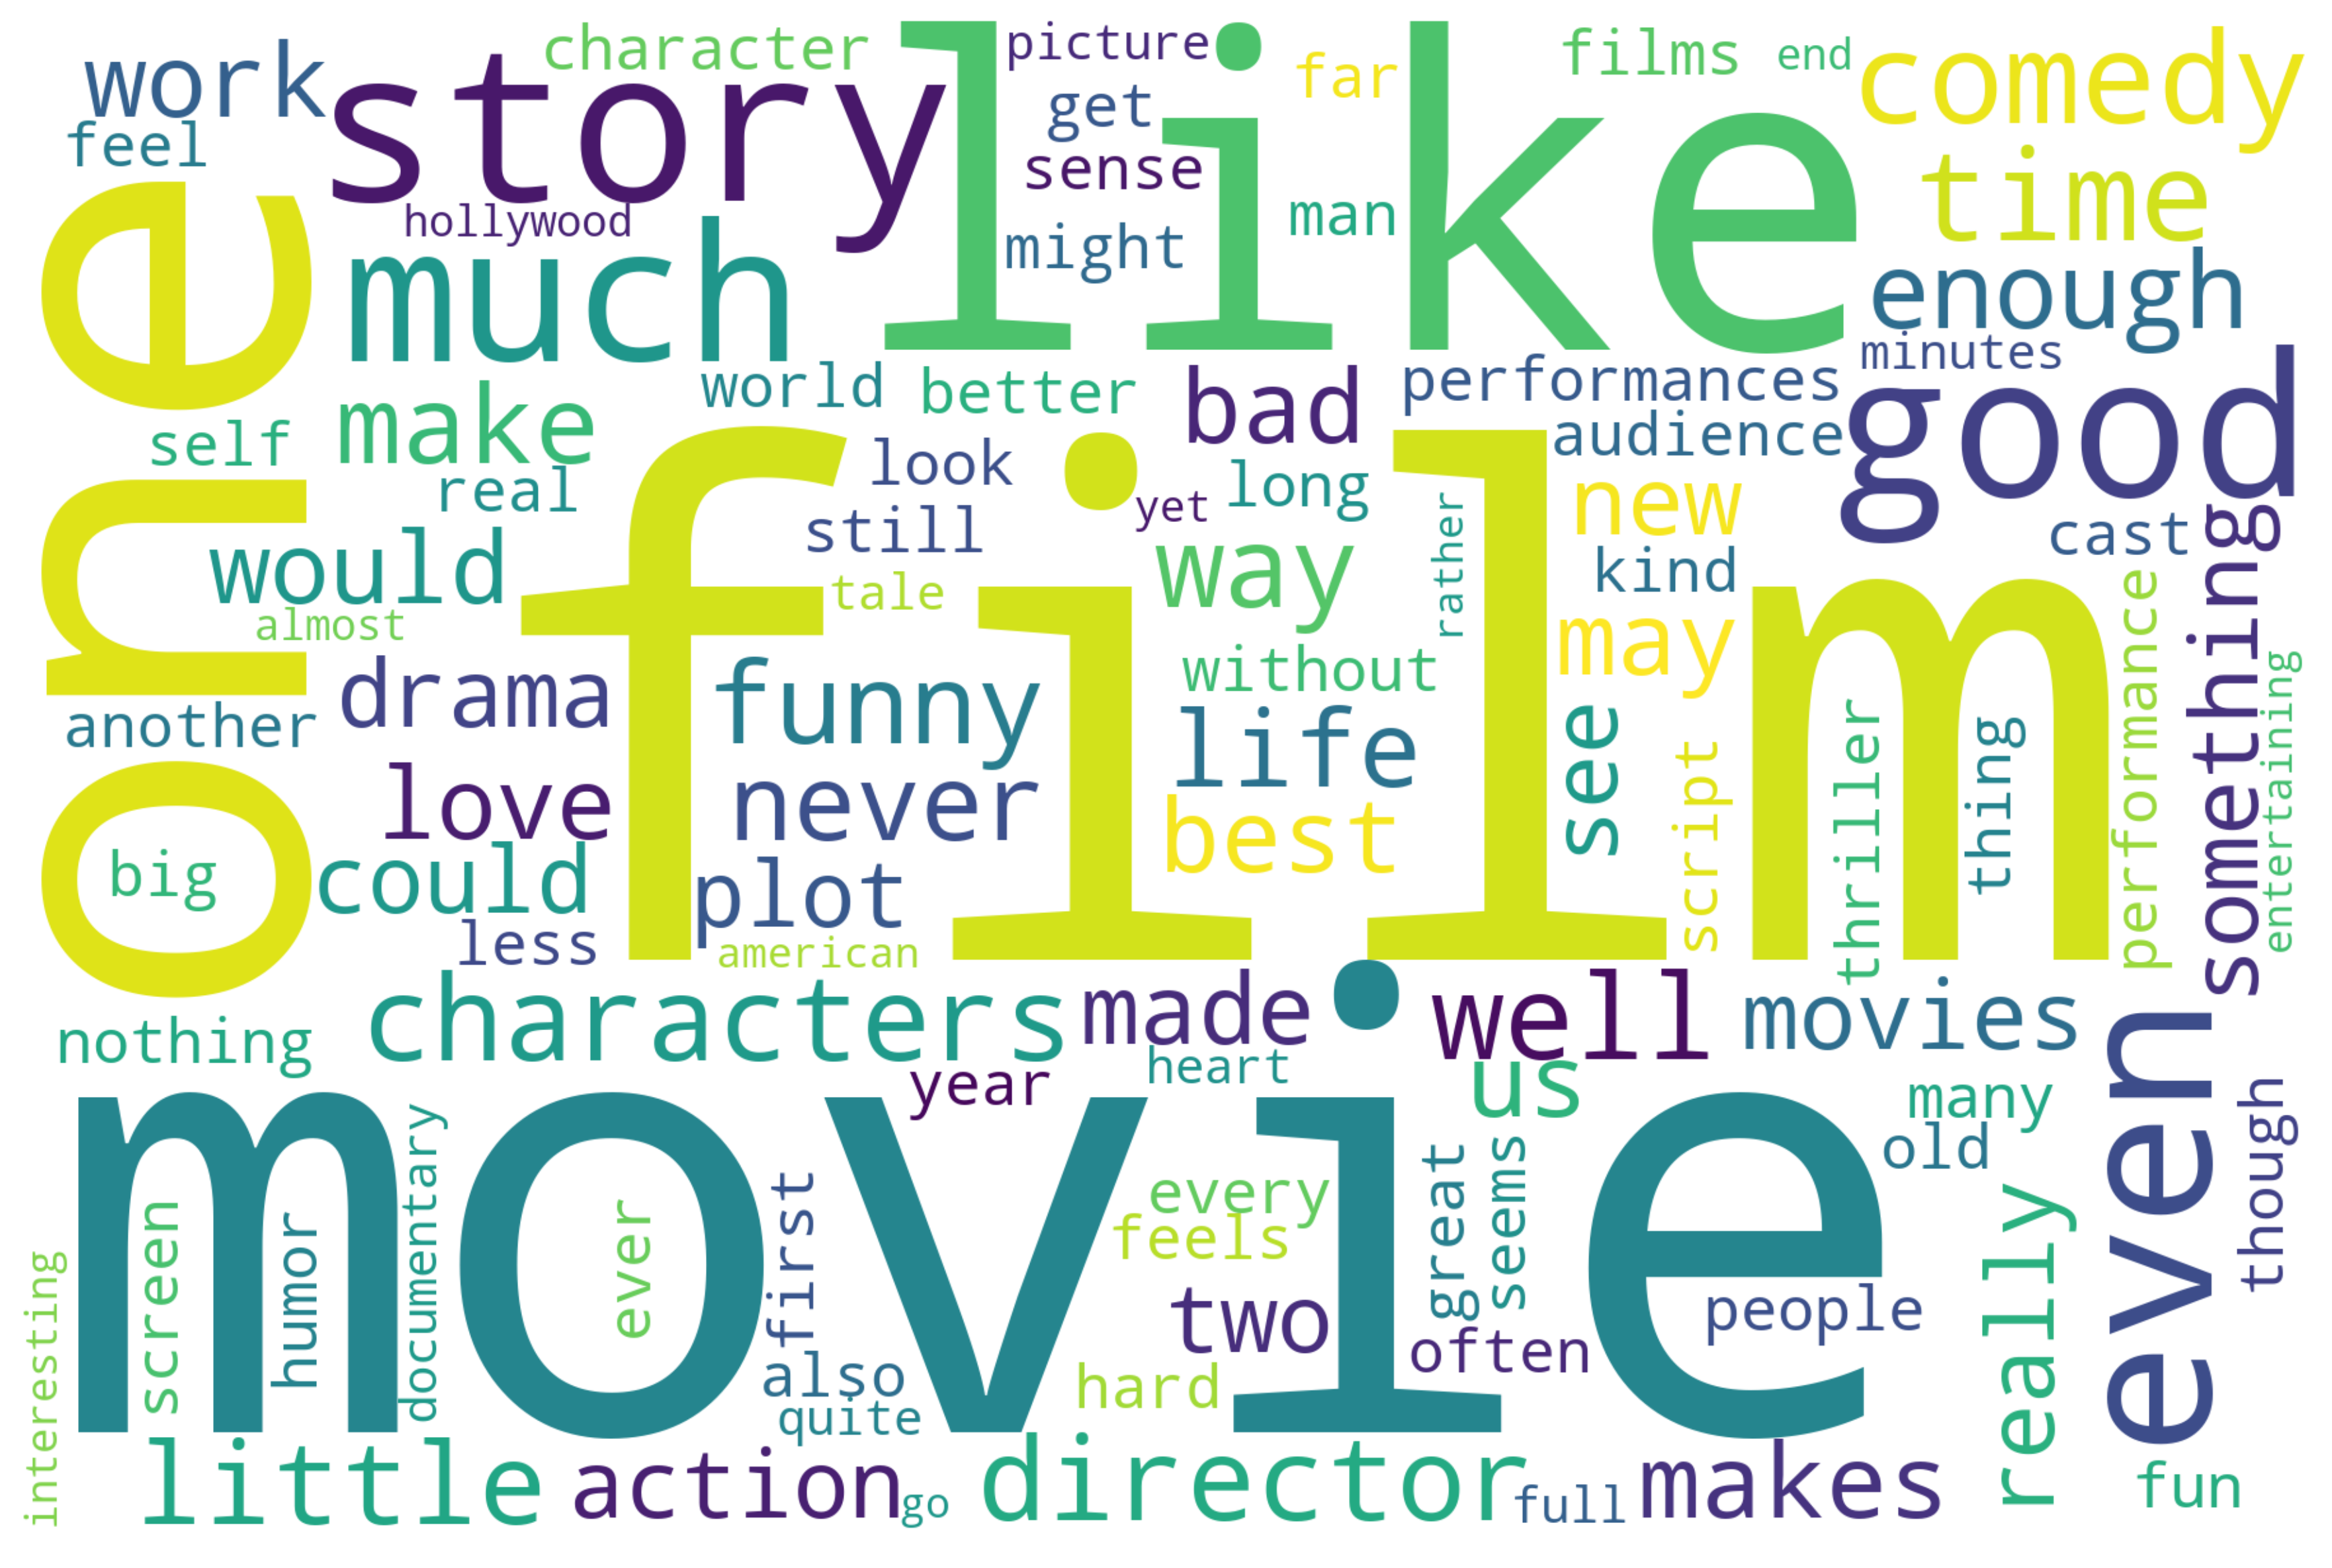

In [43]:
df_rtm['clean_text'] = hero.clean(df_rtm['text'])

hero.wordcloud(df_rtm['clean_text'],
               width = 1800, height = 1200, max_words = 100,
               background_color = 'white', colormap = 'viridis')

In [ ]:
df_rtm['dr'] = (
    df_rtm['text']
    .pipe(hero.clean)
    .pipe(hero.tfidf, max_features = 500)
    #.pipe(hero.pca, n_components = 100)
    .pipe(hero.tsne, n_components = 2, perplexity = 200)
)

'''df_rtm['text_wrap'] = df_rtm['text'].str[:200]
df_rtm['text_wrap'] = df_rtm['text_wrap'].str.wrap(50)
df_rtm['text_wrap'] = df_rtm['text_wrap'].str.replace('\n','<br>', regex=False)'''

hero.scatterplot(df_rtm, 'dr', color='label', hover_data = ['text'])

In [11]:
df_rtm = pd.read_csv('bbc-text.csv')